In [1]:
import sys
import time
import logging
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

In [2]:
model='mobilenet_thin'
resize='432x368'
w, h = model_wh(resize)

In [3]:
e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2020-12-27 11:37:05,542] [TfPoseEstimator] [INFO] loading graph from /home/martinhoang11/VinBigdata/Pose_Estimation/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
2020-12-27 11:37:05,542 INFO loading graph from /home/martinhoang11/VinBigdata/Pose_Estimation/tf-pose-estimation/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimator/M

Shape:  (1008, 464, 3)


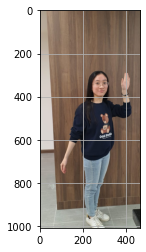

In [22]:
image_path = './images/img1.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.grid();
print('Shape: ', image.shape)

In [23]:
image = common.read_imgfile(image_path, None, None)
image.shape

(1008, 464, 3)

In [25]:
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=8.0)

In [26]:
e.heatMat[0][0]

array([-1.7213305e-03, -4.9716942e-03,  1.5703095e-03,  8.5962508e-03,
        4.9872901e-03,  1.2031533e-03,  3.7833638e-03, -7.7217496e-03,
        6.1363801e-03, -6.9829170e-03, -3.7776455e-03,  9.3944836e-04,
        1.1542765e-03, -1.8252358e-03,  2.8596595e-03, -1.2398664e-02,
        1.3349898e-02, -1.5291063e-02,  1.0014133e+00], dtype=float32)

In [27]:
e.heatMat[0][0][18]

1.0014133

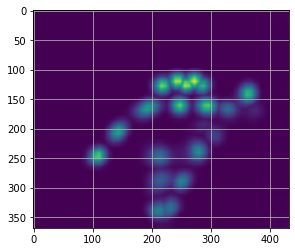

In [28]:
max_prob = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(max_prob)
plt.grid();

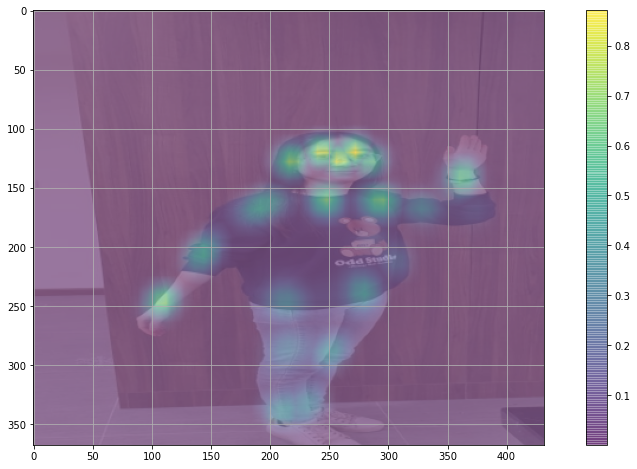

In [29]:
plt.figure(figsize=(15,8))
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)
plt.imshow(bgimg, alpha=0.5)
plt.imshow(max_prob, alpha=0.5)
plt.colorbar()
plt.grid();

In [30]:
e.pafMat.shape

(368, 432, 38)

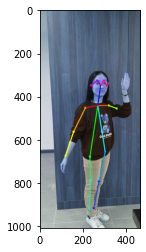

In [31]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
plt.imshow(image)

2020-12-27 11:42:33,254 WARNING Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


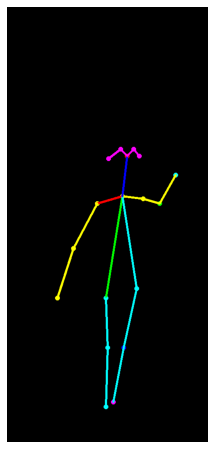

In [32]:
image = common.read_imgfile(image_path, None, None)
humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
black_background = np.zeros(image.shape)
skeleton = TfPoseEstimator.draw_humans(black_background, humans, imgcopy=False)
plt.figure(figsize=(15,8))
plt.imshow(skeleton);
plt.grid(); 
plt.axis('off');

In [33]:
str(humans[0]).split('BodyPart:')

['',
 '0-(0.60, 0.34) score=0.73 ',
 '1-(0.57, 0.43) score=0.69 ',
 '2-(0.45, 0.45) score=0.47 ',
 '3-(0.33, 0.55) score=0.48 ',
 '4-(0.25, 0.67) score=0.61 ',
 '5-(0.68, 0.44) score=0.61 ',
 '6-(0.76, 0.45) score=0.31 ',
 '7-(0.84, 0.39) score=0.56 ',
 '8-(0.49, 0.67) score=0.32 ',
 '9-(0.50, 0.78) score=0.27 ',
 '10-(0.49, 0.92) score=0.36 ',
 '11-(0.64, 0.65) score=0.41 ',
 '12-(0.58, 0.78) score=0.39 ',
 '13-(0.53, 0.91) score=0.30 ',
 '14-(0.56, 0.33) score=0.77 ',
 '15-(0.63, 0.33) score=0.87 ',
 '16-(0.50, 0.35) score=0.69 ',
 '17-(0.66, 0.34) score=0.51']

In [34]:
def show_keypoints(image, hum, human=1, color='orange', showBG = True):
    if human == 0: human = 1
    num_hum = len(hum)
    keypoints = str(str(str(hum[human-1]).split('BodyPart:')[1:]).split('-')).split(' score=')
    keypoints_list=[]
    for i in range (len(keypoints)-1): 
        pnt = keypoints[i][-11:-1]
        pnt = tuple(map(float, pnt.split(', ')))
        keypoints_list.append(pnt)

    keypts_array = np.array(keypoints_list)
    keypts_array = keypts_array*(image.shape[1],image.shape[0])
    keypts_array = keypts_array.astype(int)
    keypts_array

    plt.figure(figsize=(10,10))
    plt.axis([0, image.shape[1], 0, image.shape[0]])  
    plt.scatter(*zip(*keypts_array), s=200, color=color, alpha=0.6)
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      
    plt.imshow(image)
    ax=plt.gca() 
    ax.set_ylim(ax.get_ylim()[::-1]) 
    ax.xaxis.tick_top() 
    plt.title('Keypoints Person [{}] from {} humans detected\n'.format(human, num_hum))
    plt.grid();

    for i, txt in enumerate(keypts_array):
        ax.annotate(i, (keypts_array[i][0]-5, keypts_array[i][1]+5))
            
    return keypts_array


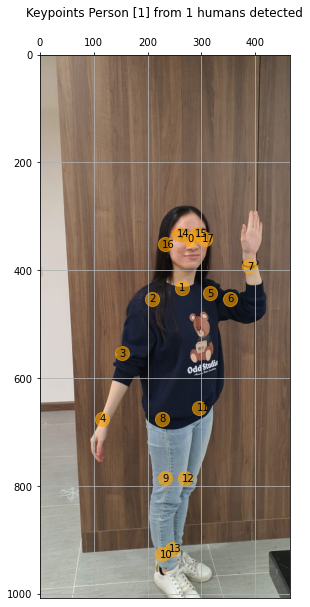

In [35]:
keypts_array = show_keypoints(image, humans)

In [36]:
def show_vectormaps(image):
    tmp2 = e.pafMat.transpose((2, 0, 1))
    tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
    tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)
    
    fig = plt.figure(figsize=(20,15))

    a = fig.add_subplot(2, 2, 3)
    a.set_title('Vectormap-x')
    # plt.imshow(CocoPose.get_bgimg(inp, target_size=(vectmap.shape[1], vectmap.shape[0])), alpha=0.5)
    plt.imshow(tmp2_odd, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()

    a = fig.add_subplot(2, 2, 4)
    a.set_title('Vectormap-y')
    # plt.imshow(CocoPose.get_bgimg(inp, target_size=(vectmap.shape[1], vectmap.shape[0])), alpha=0.5)
    plt.imshow(tmp2_even, cmap=plt.cm.gray, alpha=0.5)
    plt.colorbar()
    plt.show()

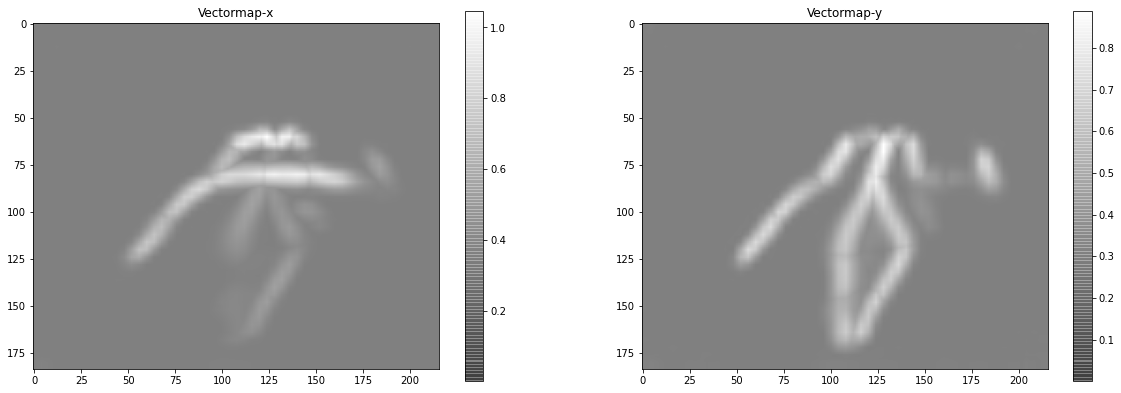

In [37]:
show_vectormaps(image)

In [38]:
def get_human_pose(image_path, showBG = True):
    image = common.read_imgfile(image_path, None, None)
  
    if image is None:
        logger.error('Image can not be read, path=%s' % image)
        sys.exit(-1)

    t = time.time()
    
    humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
    elapsed = time.time() - t

    #logger.info('inference image: %s in %.4f seconds.' % (image, elapsed))
    if showBG == False:
        image = np.zeros(image.shape)
    image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
    return image, humans

def plot_img(image, axis=False, grid=False, showBG = True):
    plt.figure(figsize=(15,8))
    if showBG:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image);
    if grid == True:
        plt.grid();
    if axis == False:       
        plt.axis('off');